Nama : Dikri Hidayat
NIM  : 1197050030
Kelas Teori Dan Praktikum Mesin D

Disini Prediksi Kadar Emisi Karbon menggunakan Linear Regresion dan Multiple Regresion

Link Google Colab : https://colab.research.google.com/drive/1i5_Rzx6J2Au6rL_v7ow97KZakl_mV5WF?usp=sharing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FuelConsumption.csv to FuelConsumption.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd
df=pd.read_csv("FuelConsumption.csv")
print(df)


      MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0 

In [ ]:
df.isnull()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,False,False,False,False,False,False,False,False,False,False,False,False,False
1063,False,False,False,False,False,False,False,False,False,False,False,False,False
1064,False,False,False,False,False,False,False,False,False,False,False,False,False
1065,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [ ]:
wanted_data = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','CO2EMISSIONS']]
wanted_data

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
...,...,...,...,...
1062,3.0,6,13.4,271
1063,3.2,6,13.2,264
1064,3.0,6,13.4,271
1065,3.2,6,12.9,260


In [ ]:
wanted_data.isnull().sum()

ENGINESIZE              0
CYLINDERS               0
FUELCONSUMPTION_CITY    0
CO2EMISSIONS            0
dtype: int64

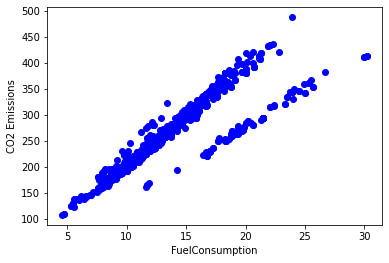

In [ ]:
plt.scatter(wanted_data.FUELCONSUMPTION_CITY, wanted_data.CO2EMISSIONS,color="blue")
plt.xlabel("FuelConsumption")
plt.ylabel("CO2 Emissions")
plt.show()


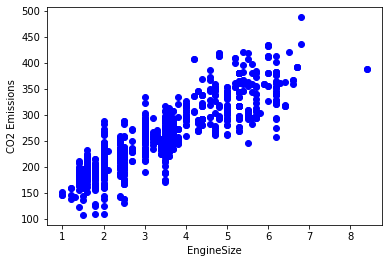

In [ ]:
plt.scatter(wanted_data.ENGINESIZE, wanted_data.CO2EMISSIONS,color="blue")
plt.xlabel("EngineSize")
plt.ylabel("CO2 Emissions")
plt.show()

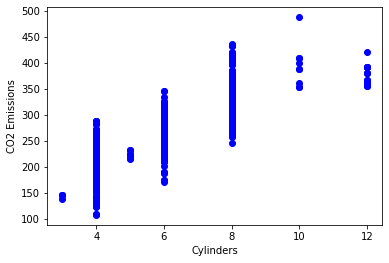

In [ ]:
plt.scatter(wanted_data.CYLINDERS, wanted_data.CO2EMISSIONS,color="blue")
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions")
plt.show()

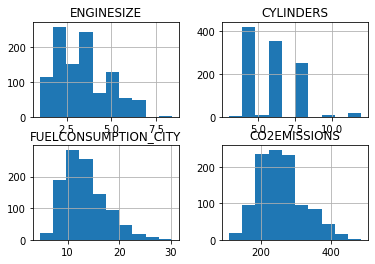

In [ ]:
wanted_data.hist()
plt.show()

In [ ]:
wanted_data

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
...,...,...,...,...
1062,3.0,6,13.4,271
1063,3.2,6,13.2,264
1064,3.0,6,13.4,271
1065,3.2,6,12.9,260


In [ ]:
msk = np.random.rand(len(wanted_data)) < 0.8
train = wanted_data[msk]
test = wanted_data[~msk]

In [ ]:
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
...,...,...,...,...
1060,3.0,6,13.2,264
1062,3.0,6,13.4,271
1063,3.2,6,13.2,264
1064,3.0,6,13.4,271


In [ ]:
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
6,3.5,6,11.8,232
10,2.4,4,11.2,225
11,3.5,6,12.1,239
12,5.9,12,18.0,359
17,4.7,8,18.1,354
...,...,...,...,...
1046,2.5,5,11.4,225
1048,2.0,4,8.1,192
1059,3.2,6,11.9,235
1061,3.2,6,13.0,258


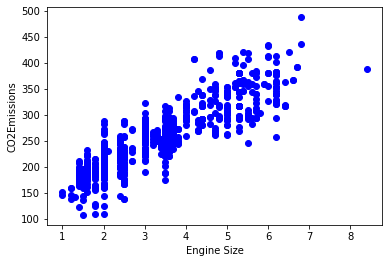

In [ ]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2Emissions')
plt.show()

In [ ]:
regression = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regression.fit(train_x,train_y)
print('Coefficients: ',regression.coef_)
print('Intercept: ',regression.intercept_)

Coefficients:  [[38.88056731]]
Intercept:  [125.92989638]


Text(0, 0.5, 'Co2Emission')

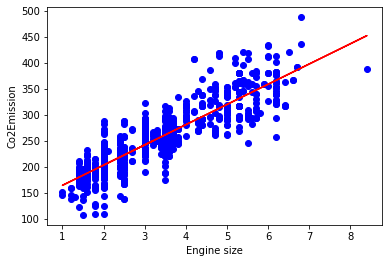

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regression.coef_[0][0]*train_x + regression.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Co2Emission")

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regression.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) **2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y))

Mean absolute error: 24.10
Residual sum of squares (MSE): 1046.22
R2-score: 0.67


In [ ]:
print("Predicted Co2 emission: " , test_y_hat )

Predicted Co2 emission:  [[262.01188198]
 [219.24325793]
 [262.01188198]
 [355.32524354]
 [308.66856276]
 [203.69103101]
 [242.57159832]
 [370.87747046]
 [289.2282791 ]
 [328.10884642]
 [242.57159832]
 [281.45216564]
 [359.21330027]
 [281.45216564]
 [203.69103101]
 [203.69103101]
 [242.57159832]
 [242.57159832]
 [203.69103101]
 [297.00439256]
 [242.57159832]
 [297.00439256]
 [265.89993871]
 [203.69103101]
 [203.69103101]
 [203.69103101]
 [265.89993871]
 [242.57159832]
 [366.98941373]
 [265.89993871]
 [265.89993871]
 [366.98941373]
 [366.98941373]
 [366.98941373]
 [195.91491755]
 [331.99690315]
 [331.99690315]
 [331.99690315]
 [331.99690315]
 [312.55661949]
 [359.21330027]
 [359.21330027]
 [219.24325793]
 [331.99690315]
 [293.11633583]
 [331.99690315]
 [180.36269062]
 [265.89993871]
 [219.24325793]
 [219.24325793]
 [265.89993871]
 [265.89993871]
 [265.89993871]
 [347.54913007]
 [203.69103101]
 [180.36269062]
 [180.36269062]
 [203.69103101]
 [304.78050603]
 [304.78050603]
 [335.88495988]